In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn

In [2]:
import nltk
from nltk.corpus import stopwords
import string
import re
from collections import Counter, OrderedDict

In [3]:
def u_split(text):
    k=re.match(r'(\d*)(\w*)',text)
    if k[1].isdigit() and k[2].isalpha():
        return [k[1],k[2]]
    else :
        return [text]
    
def unique(sequence,):
    seen = set()
    return [x for x in sequence if not (x in seen or seen.add(x))]  

def tokenize(text,frequent_words=[],split=False,alpha_only=True):
    text=text.lower()
    text = "".join([char for char in text if char not in string.punctuation])
    
    words=[word for word in nltk.word_tokenize(text) if word not in stopwords.words('indonesian')]
    
    if alpha_only:
        words=[word for word in words if word.isalpha()]
    
    if frequent_words==[]:
        pass
    else:
        words=[word for word in nltk.word_tokenize(text) if word not in frequent_words]
        
    if split:
        words=[u_split(word) for word in words]
        tokens=[token for lists in words for token in lists]
        return unique(tokens)
    else:
        return unique(words)
       

In [4]:
df=pd.read_csv('tweets_about_jokowi.csv')

In [5]:
df.dropna(inplace=True)
df.count()

Unnamed: 0    19721
user          19721
tweet         19721
dtype: int64

In [6]:
word_bag=[]
for tweet in df['tweet']:
    word_bag[0:0]=tokenize(tweet)

In [7]:
Dict=Counter(word_bag)
data=dict(Dict)
data_sorted = {k: v for k, v in sorted(data.items(), key=lambda x: x[1],reverse=True)}

In [8]:
n_words=pd.DataFrame({'word':data_sorted.keys(),'n':data_sorted.values()})

In [9]:
n_words=n_words[n_words['n']>2]

In [10]:
n_words=n_words[n_words['word'].str.len()>2]

In [11]:
list(n_words[n_words['word'].str.len()==3]['word'])

['ikn',
 'gak',
 'aja',
 'nya',
 'dgn',
 'dob',
 'uas',
 'tdk',
 'klo',
 'sih',
 'cpo',
 'nih',
 'sdh',
 'mei',
 'era',
 'utk',
 'tau',
 'krn',
 'kau',
 'ayo',
 'org',
 'jgn',
 'pro',
 'tuh',
 'ojo',
 'dah',
 'the',
 'kst',
 'cek',
 'iya',
 'mas',
 'dlm',
 'mah',
 'deh',
 'isu',
 'kkb',
 'loe',
 'ama',
 'gue',
 'sbg',
 'bpk',
 'dki',
 'wei',
 'sby',
 'lin',
 'che',
 'bro',
 'mrp',
 'and',
 'yuk',
 'hrs',
 'pki',
 'pas',
 'msh',
 'loh',
 'dpr',
 'kpk',
 'yaa',
 'udh',
 'via',
 'dll',
 'blm',
 'lho',
 'spt',
 'bbm',
 'yah',
 'gas',
 'air',
 'kek',
 'dpt',
 'gua',
 'bkn',
 'bos',
 'bgt',
 'mrk',
 'sin',
 'sdm',
 'hti',
 'koq',
 'you',
 'iri',
 'kpd',
 'lbh',
 'elu',
 'ktp',
 'tol',
 'knp',
 'sri',
 'tsb',
 'isi',
 'jdi',
 'ham',
 'for',
 'mmg',
 'fpi',
 'sok',
 'pol',
 'dri',
 'kak',
 'kah',
 'byk',
 'tim',
 'tni',
 'gus',
 'top',
 'lha',
 'oil',
 'tua',
 'adu',
 'sik',
 'klw',
 'wow',
 'jis',
 'jkw',
 'not',
 'gmn',
 'kkn',
 'ttp',
 'hak',
 'eko',
 'swt',
 'who',
 'bbi',
 'klu',
 'bin',


In [12]:
#hand picking meaningful words and erase it
word_3=[
 'gak',
 'aja',
 'nya',
 'dgn',
 'tdk',
 'klo',
 'sih',
 'nih',
 'sdh',
 'mei',
 'utk',
 'tau',
 'krn',
 'kau',
 'ayo',
 'org',
 'jgn',
 'tuh',
 'dah',
 'the',
 'kst',
 'cek',
 'iya',
 'mas',
 'dlm',
 'mah',
 'deh',
 'loe',
 'ama',
 'gue',
 'sbg',
 'wei',
 'sby',
 'lin',
 'che',
 'bro',
 'mrp',
 'and',
 'yuk',
 'pas',
 'msh',
 'loh',
 'yaa',
 'udh',
 'via',
 'dll',
 'blm',
 'lho',
 'spt',
 'yah',
 'kek',
 'dpt',
 'gua',
 'bkn',
 'bos',
 'bgt',
 'mrk',
 'sin',
 'sdm',
 'hti',
 'koq',
 'you',
 'iri',
 'kpd',
 'lbh',
 'elu',
 'knp',
 'tsb',
 'isi',
 'jdi',
 'ham',
 'for',
 'mmg',
 'sok',
 'pol',
 'dri',
 'kak',
 'kah',
 'byk',
 'tim',
 'top',
 'lha',
 'sik',
 'klw',
 'wow',
 'jis',
 'not',
 'gmn',
 'ttp',
 'eko',
 'who',
 'bbi',
 'klu',
 'bin',
 'are',
 'ttg',
 'jam',
 'yak',
 'ora',
 'tpi',
 'thn',
 'ide',
 'btw',
 'emg',
 'tuk',
 'ato',
 'yes',
 'brp',
 'kyk',
 'trs',
 'wna',
 'our',
 'het',
 'dlu',
 'elo',
 'unt',
 'thd',
 'aje',
 'iki',
 'dng',
 'gpp',
 'all',
 'blt',
 'hny',
 'kab',
 'sgt',
 'tag',
 'fgd',
 'luh',
 'dhe',
 'woi',
 'mba',
 'wis',
 'kib',
 'adl',
 'ksp',
 'sah',
 'men',
 'ngk',
 'has',
 'uno',
 'nak',
 'opo',
 'sma',
 'one',
 'min',
 'oke',
 'spy',
 'new',
 'sya',
 'tbs',
 'bhw',
 'ban',
 'bau',
 'nek',
 'ari',
 'ber',
 'kec',
 'uda',
 'ape',
 'ala',
 'otk',
 'dsb',
 'cap',
 'lgi',
 'can',
 'met',
 'nol',
 'lol',
 'teh',
 'neh',
 'noh',
 'ane',
 'why',
 'non',
 'atw',
 'sea',
 'yth',
 'was',
 'roy',
 'cuk',
 'ali',
 'blg',
 'smp',
 'kpn',
 'wib',
 'put',
 'nga',
 'tka',
 'sll',
 'jln',
 'slh',
 'now',
 'may',
 'gih',
 'gtu',
 'bsa',
 'cma',
 'cin',
 'ton',
 'den',
 'doi',
 'but',
 'mun',
 'tea',
 'smg',
 'sda',
 'war',
 'duh',
 'out',
 'iso',
 'big',
 'sir',
 'hai',
 'day',
 'usa',
 'its',
 'cmn',
 'ges',
 'mkn',
 'ntt',
 'say',
 'him',
 'mak',
 'die',
 'sak',
 'how',
 'wkt',
 'ati',
 'wae',
 'gwe',
 'pny',
 'ind',
 'ehh',
 'pdb',
 'man',
 'tar',
 'kog',
 'hei',
 'oap',
 'yok',
 'jng',
 'bus',
 'ptm',
 'bak',
 'did',
 'ter',
 'ygy',
 'wes',
 'idi',
 'sip',
 'iku',
 'rek',
 'dkk',
 'skg',
 'api',
 'sek',
 'krl',
 'abs',
 'tho',
 'usd',
 'msk',
 'woy',
 'anu',
 'mui',
 'seh',
 'kua',
 'hrg',
 'nda',
 'jan',
 'buk',
 'nnt',
 'dek',
 'skr',
 'tok',
 'isa',
 'stb',
 'ceo',
 'hin',
 'his',
 'imf',
 'coy',
 'mlh',
 'yos',
 'teu',
 'set',
 '𝗣𝗿𝗼',
 'aso',
 'mip',
 'ito',
 'wik',
 'nul',
 'red',
 'nat',
 'yen',
 'ruu',
 'hey',
 'blh',
 'jir',
 'sdg',
 'pea',
 'ite',
 'lee',
 'jga',
 'flu',
 'ono',
 'bot',
 'get',
 'mhn',
 'bla',
 'way',
 'tes',
 'bae',
 'cuy',
 'ade',
 'ohh',
 'ame',
 'nye',
 'pls',
 'dpn',
 'ika',
 'iye',
 'hub',
 'ntr',
 'dwi',
 'smk',
 'shg',
 'bln',
 'akn',
 'jet',
 'koe',
 'oge',
 'ybs',
 'ahh',
 'dtg',
 'lpg',
 'mou',
 'oki',
 'cak',
 'tri',
 'mng',
 'lae',
 'bhs',
 'aya',
 'blk',
 'ida',
 'end',
 'pke',
 'tnp',
 'mlm',
 'hot',
 'dul',
 'bgm',
 'yng',
 'aka',
 'uji',
 'fix',
 'led',
 'kmu',
 'ieu',
 'goy',
 'dst',
 'tul',
 'tax',
 'bis',
 'mad',
 'sad',
 'kur',
 'kmi',
 'boy',
 'ktt',
 'sbb',
 'dak',
 'tah',
 'heh',
 'sja',
 'dmn',
 'fyi',
 'esa',
 'scr',
 'mcm',
 'kbr',
 'hel',
 'sia',
 'dik',
 'tks',
 'yoi',
 'hah',
 'gif',
 'mna',
 'sob',
 'lan',
 'sgr',
 'weh',
 'oon',
 'jas',
 'lsg',
 'tbk',
 'off',
 'bgs',
 'kmn',
 'wil',
 'egi',
 'lot',
 'tgl',
 'gdp',
 'smi',
 'pdt',
 'pos',
 'bnr',
 'mat',
 'buy',
 'olh',
 'far',
 'job',
 'waw',
 'ooo',
 'any',
 'vip',
 'ksh',
 'neg',
 'dih',
 'gen',
 'tpp',
 'lak',
 'tlp',
 'yup',
 'ben',
 'ltr',
 'win',
 'tlg',
 'kui',
 'let',
 'ruf',
 'hbs',
 'kdg',
 'kao',
 'atm',
 'pem',
 'loo',
 'san',
 'dpp',
 'nir',
 'kli',
 'hil',
 'lie',
 'son',
 'bad',
 'dam',
 'ndk',
 'lik',
 'pst',
 'kna',
 'bea',
 'lrt',
 'ana',
 'yme',
 'mao',
 'joe',
 'bah',
 'nge',
 'duo',
 'rpp',
 'too',
 'laa',
 'sen',
 'sex',
 'syg',
 'icw',
 'plt',
 'age',
 'see'
 'nct',
 'kwh',
 'ump',
 'nur',
 'uki',
 'acc',
 'box',
 'ava',
 'diy',
 'jos',
 'wkw',
 'urg',
 'lek']

In [14]:
#Remove meaningless 3 characters word
pat='|'.join(word_3)
n_words=n_words[~n_words['word'].str.contains(pat,case=False)]
n_words[n_words['word'].str.len()==3]

,word,n
10,ikn,753
38,dob,319
48,uas,293
65,cpo,238
74,era,217
...,...,...
6553,lsm,3
6575,btp,3
7019,see,3
7024,pkc,3


In [15]:
def word_count(df):
    df['count']=1
    freq_of_n=df.groupby('n').sum()
    return freq_of_n

In [16]:
freq_of_n=word_count(n_words)
freq_of_n   #n is a number of occurence and "count" show how many words occure n times

,count
n,
3,515
4,344
5,214
6,169
7,130
...,...
753,1
1017,1
2722,1


In [17]:
freq_of_n_cut=freq_of_n[(freq_of_n['count']>10)]

<AxesSubplot:xlabel='n', ylabel='count'>

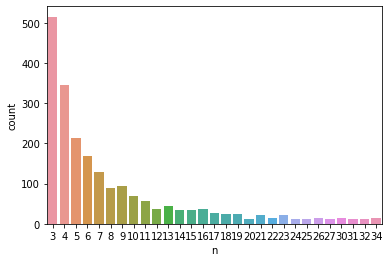

In [18]:
sn.barplot(x=freq_of_n_cut.index,y='count',data=freq_of_n_cut)

In [19]:
must_include=list(n_words['word'])

In [20]:
feature=[]
for tweet in df['tweet']:
    words=[word for word in nltk.word_tokenize(tweet) if word in must_include]
    feature.append(words)

In [21]:
feature2=[x for x in feature if len(x)>2]

In [22]:
feature2

[['kinerja', 'global', 'potensi', 'jokowi'],
 ['jokowi', 'gula', 'bicara'],
 ['hidup', 'biak', 'biak'],
 ['foto', 'kopi', 'ktp'],
 ['sosmed', 'debat', 'otak', 'sempit', 'ketemu', 'sosmed'],
 ['tidur', 'lupa', 'hadapan', 'hadapan', 'suci', 'kesulitan'],
 ['ngomong', 'otak', 'sampe', 'biar', 'live'],
 ['bodoh', 'jokowi', 'bodoh'],
 ['kagum', 'acara', 'acara'],
 ['baca', 'saudi', 'ente', 'wan', 'got', 'aniesbaswedan'],
 ['lutfi', 'bui', 'fpi'],
 ['kerja', 'struktur', 'semarang', 'cepat', 'problem', 'infrastruktur'],
 ['bnyk', 'omong', 'jokowi'],
 ['staff', 'ahli', 'buzzerp', 'cuitan', 'buzzerp', 'cuitan', 'ilmiah'],
 ['kasi', 'kode', 'keras'],
 ['kampret', 'kutu', 'loncat', 'congor', 'bacot', 'otak'],
 ['uang', 'mertua', 'mertua'],
 ['lutfi', 'rezim', 'jokowi'],
 ['dibela', 'goblok', 'novanto'],
 ['rupiah', 'goreng', 'curah', 'itupun', 'barang'],
 ['anis', 'jokowi', 'ahok'],
 ['jokowi', 'kejadian', 'tinggal'],
 ['jokowi', 'gampang', 'atasi', 'main', 'gula', 'main', 'migas', 'main'],
 ['li

In [ ]:
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer

In [ ]:
one_hot_multiclass = MultiLabelBinarizer()
feature_final=one_hot_multiclass.fit_transform(feature2)

In [ ]:
feature_final.shape

In [ ]:
feature_final

In [ ]:
from sklearn.cluster import KMeans
# Create k-mean object
cluster = KMeans(n_clusters=2, random_state=0)
# Train model
model = cluster.fit(feature_final)

In [ ]:
x=pd.DataFrame({'features':[''.join(x) for x in feature2],'label':model.labels_})